In [40]:
import numpy as np
import scipy
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 12

ModuleNotFoundError: No module named 'scipy'

In [2]:
x = np.arange(8,31)
input_ix = np.cumsum(x)+5
construct_ix = input_ix+1
traverse_ix = input_ix+2
cores = np.arange(2,25)
inputs = []
constructs = []
traverses = []

with open('single-node-test-results.txt') as f:
    n_threads_tmp = 2
    i = 0
    for line in f:
        i+=1
        if i in input_ix:
            inputs.append(float(line[20:28]))
        if i in construct_ix:
            constructs.append(float(line[25:33]))
        if i in traverse_ix:
            traverses.append(float(line[22:30]))
            
times = pd.DataFrame({
        "input_times":inputs,
        "construct_times":constructs,
        "traverse_times":traverses
    },
    index=cores)
times['total_time'] = times.sum(axis=1)

In [17]:
input_ix = np.array([100,226,376,550,748])
construct_ix = input_ix+1
traverse_ix = input_ix+2
cores = np.array([96,120,144,168,192])
inputs = []
constructs = []
traverses = []

with open('multi-node-test-results.txt') as f:
    n_threads_tmp = 2
    i = 0
    for line in f:
        i+=1
        if i in input_ix:
            inputs.append(float(line[20:28]))
        if i in construct_ix:
            constructs.append(float(line[25:33]))
        if i in traverse_ix:
            traverses.append(float(line[22:30]))
            
times_long = pd.DataFrame({
        "input_times":inputs,
        "construct_times":constructs,
        "traverse_times":traverses
    },
    index=cores)
times_long['total_time'] = times_long.sum(axis=1)

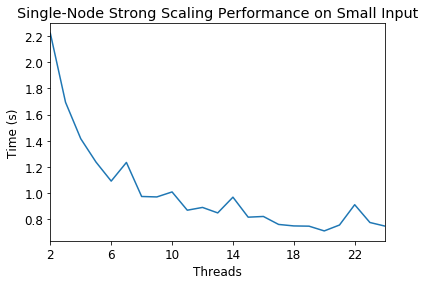

In [39]:
ticks = np.arange(2,25,4)
ax = times['total_time'].plot(xticks=ticks)
ax.set_xlabel('Threads')
ax.set_ylabel('Time (s)')
ax.set_title('Single-Node Strong Scaling Performance on Small Input')
plt.savefig('single.png')

In [ ]:
scipy.optimize.curve_fit(lambda t,a,b: a*numpy.exp(b*t),  x,  y)

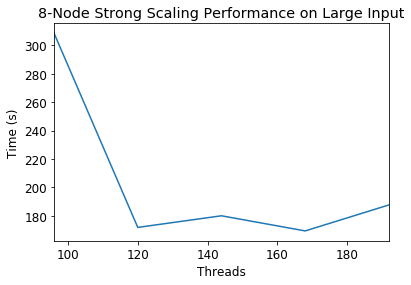

In [41]:
ax = times_long['total_time'].plot()
ax.set_xlabel('Threads')
ax.set_ylabel('Time (s)')
ax.set_title('8-Node Strong Scaling Performance on Large Input')
plt.savefig('multi.png')

In [ ]:
for i in [times,times_long]:
    